### Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals and Objectives

There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
___All the outcomes and understandings are written in GREEN___

In [2]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

###  Loading and Cleaning Data

##### Import Data

In [3]:
# Loading the data using Pandas
df_leads = pd.read_csv('Leads.csv')
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


####  Data Inspection

In [4]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# The .shape code gives the no. of rows and columns
df_leads.shape

(9240, 37)

In [6]:
#To get an idea of the numeric values, use .describe()
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### Cleaning the dataframe

In [7]:
# To check for duplicates
df_leads.loc[df_leads.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [8]:
# To check for duplicates in columns
print(sum(df_leads.duplicated(subset = 'Lead Number')))
print(sum(df_leads.duplicated(subset = 'Prospect ID')))

0
0


In [9]:
df_leads = df_leads.drop(['Lead Number','Prospect ID'],1)

In [10]:
# To convert 'Select' values to NaN
df_leads = df_leads.replace('Select', np.nan)
# To get percentage of null values in each column
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

We'll drop columns with more than 50% of missing values as it does not make sense to impute these many values. But the variable 'Lead Quality', which has 51.6% missing values seems promising. So we'll keep it for now.

In [11]:
# To drop columns with more than 50% of missing values as it does not make sense to impute these many values
df_leads = df_leads.drop(df_leads.loc[:,list(round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)>52)].columns, 1)

For other columns, we have to work on column by column basis.

For categorical variables, we'll analyse the count/percentage plots.
For numerical variable, we'll describe the variable and analyse the box plots.

In [12]:
# Function for percentage plots
def percent_plot(var):
    values = (df_leads[var].value_counts(normalize=True)*100)
    plt_p = values.plot.bar(color=sns.color_palette('deep'))
    plt_p.set(xlabel = var, ylabel = '% in dataset')

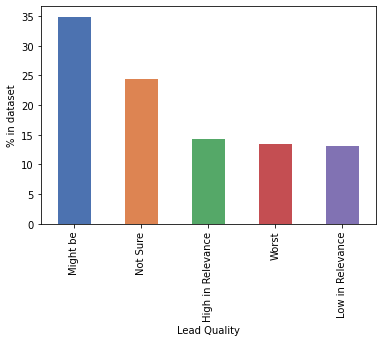

In [13]:
# For Lead Quality
percent_plot('Lead Quality')

In [14]:
df_leads['Lead Quality'] = df_leads['Lead Quality'].replace(np.nan, 'Not Sure')

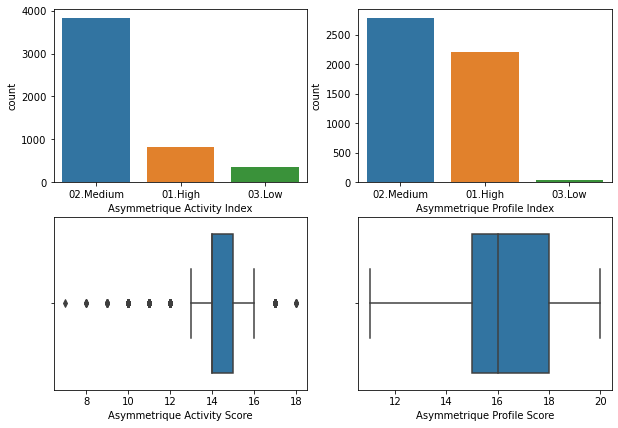

In [15]:
# For 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'
asym_list = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
plt.figure(figsize=(10, 7))
for var in asym_list:
    plt.subplot(2,2,asym_list.index(var)+1)
    if 'Index' in var:
        sns.countplot(df_leads[var])
    else:
        sns.boxplot(df_leads[var])
plt.show()

In [16]:
# To describe numerical variables
df_leads[asym_list].describe()

,Asymmetrique Activity Score,Asymmetrique Profile Score
count,5022.000000,5022.000000
mean,14.306252,16.344883
std,1.386694,1.811395
min,7.000000,11.000000
25%,14.000000,15.000000
50%,14.000000,16.000000
75%,15.000000,18.000000
max,18.000000,20.000000


These four variables have more than 45% missing values and it can be seen from the plots that there is a lot of variation in them. So, it's not a good idea to impute 45% of the data. Even if we impute with mean/median for numerical variables, these values will not have any significant importance in the model. We'll have to drop these variables.

In [17]:
df_leads = df_leads.drop(asym_list,1)
# To get percentage of null values in each column
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

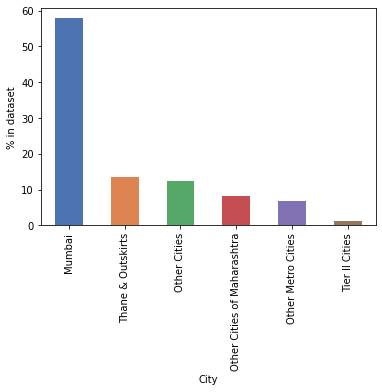

In [18]:
# For 'City'
percent_plot('City')

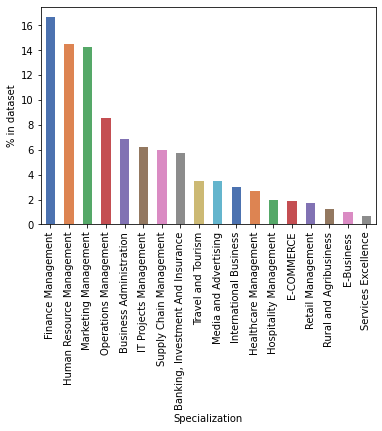

In [19]:
df_leads['City'] = df_leads['City'].replace(np.nan, 'Mumbai')
# For 'Specialization'
percent_plot('Specialization')

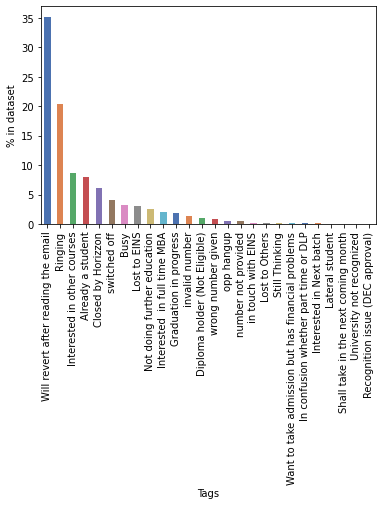

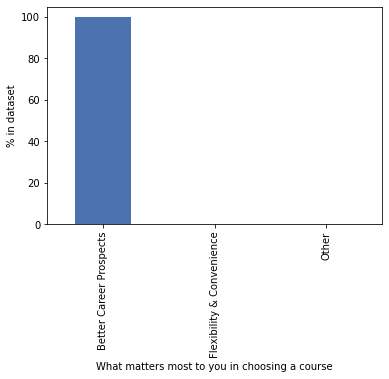

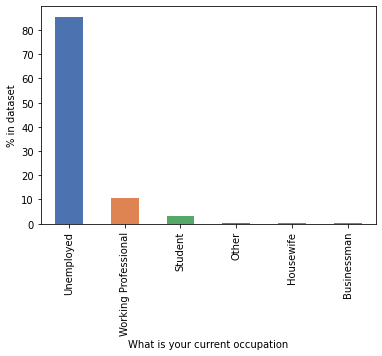

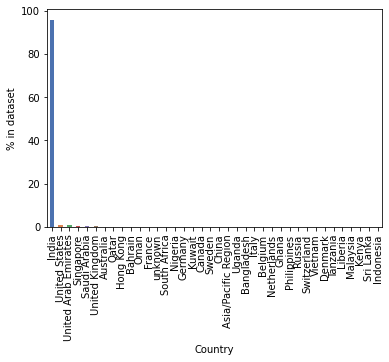

In [20]:
df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan, 'Others')
var_list = ['Tags', 'What matters most to you in choosing a course', 'What is your current occupation', 'Country']

for var in var_list:
    percent_plot(var)
    plt.show()

In all these categorical variables, one value is clearly more frequent than all others. So it makes sense to impute with the most frequent values.

In [21]:
# To impute with the most frequent value
for var in var_list:
    top_frequent = df_leads[var].describe()['top']
    df_leads[var] = df_leads[var].replace(np.nan, top_frequent)
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

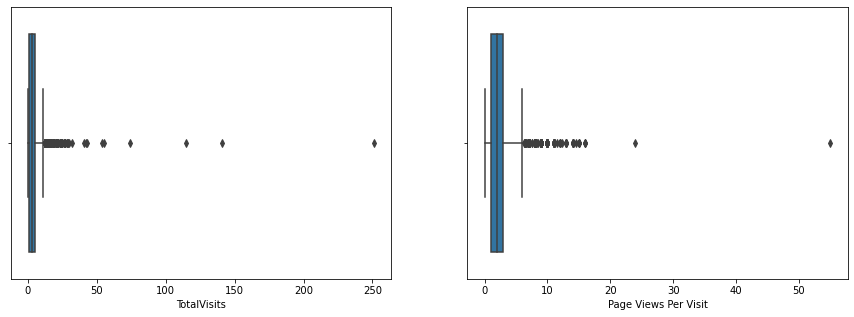

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [22]:
visit_list = ['TotalVisits', 'Page Views Per Visit']
plt.figure(figsize=(15, 5))
for var in visit_list:
    plt.subplot(1,2,visit_list.index(var)+1)
    sns.boxplot(df_leads[var])
plt.show()

df_leads[visit_list].describe()

From the above analysis, it can be seen that there is a lot of variation in both of the variables. As the percentage of missing values for both of them are less than 2%, it is better to drop the rows containing missing values.

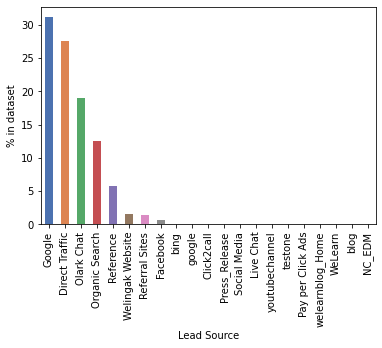

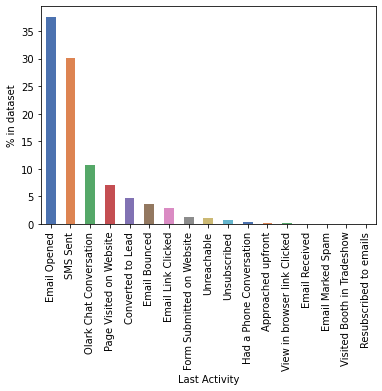

In [23]:
var_list = ['Lead Source', 'Last Activity']

for var in var_list:
    percent_plot(var)
    plt.show()

In [24]:
# To drop the rows containing missing values
df_leads.dropna(inplace = True)
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

### Data Visualization

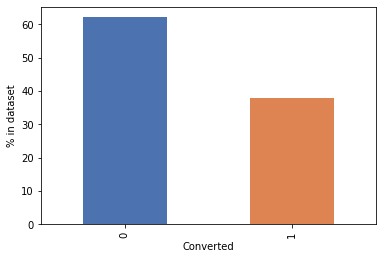

In [25]:
percent_plot('Converted')

In [26]:
(sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100

37.85541106458012

#### Visualising Numerical Variables and Outlier Treatment

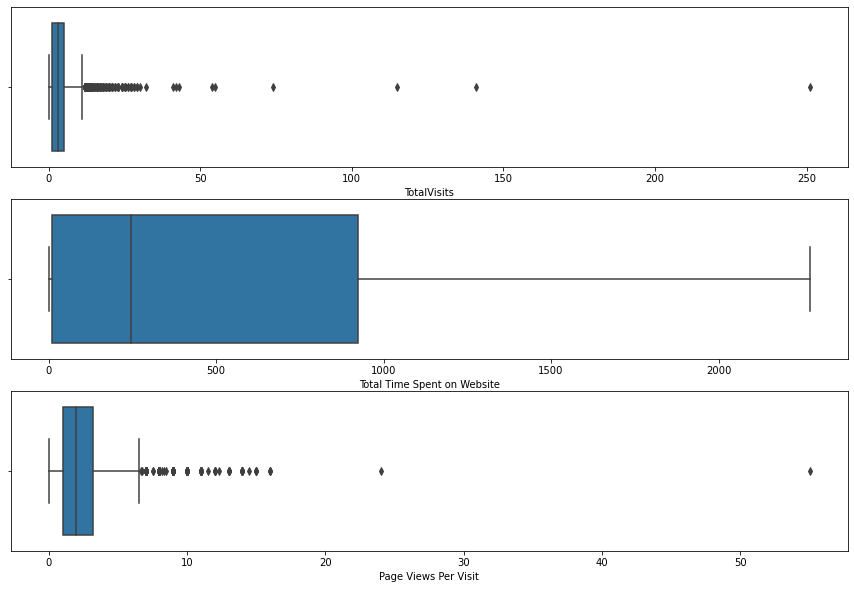

In [27]:
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(df_leads[var])
plt.show()

In [28]:
df_leads[num_var].describe([0.05,.25, .5, .75, .90, .95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000


From the boxplots, we can see that there are outliers present in the variables.

•	For 'TotalVisits', the 95% quantile is 10 whereas the maximum value is 251. Hence, we should cap these outliers at 95% value.

•	There are no significant outliers in 'Total Time Spent on Website'

•	For 'Page Views Per Visit', similar to 'TotalVisits', we should cap outliers at 95% value.

We don't need to cap at 5% as the minimum value at 5% value are same for all the variables.

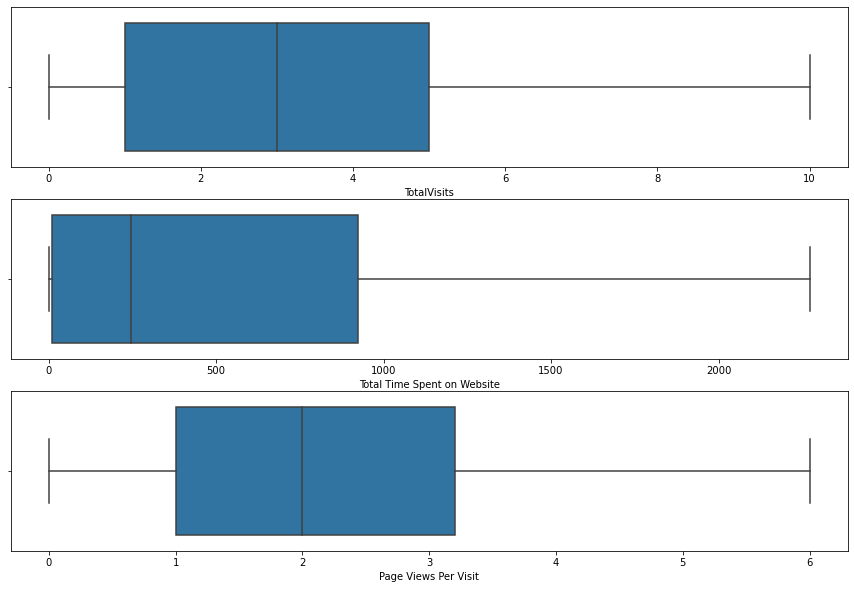

In [29]:
percentile = df_leads['TotalVisits'].quantile([0.95]).values
df_leads['TotalVisits'][df_leads['TotalVisits'] >= percentile[0]] = percentile[0]

percentile = df_leads['Page Views Per Visit'].quantile([0.95]).values
df_leads['Page Views Per Visit'][df_leads['Page Views Per Visit'] >= percentile[0]] = percentile[0]
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(df_leads[var])
plt.show()

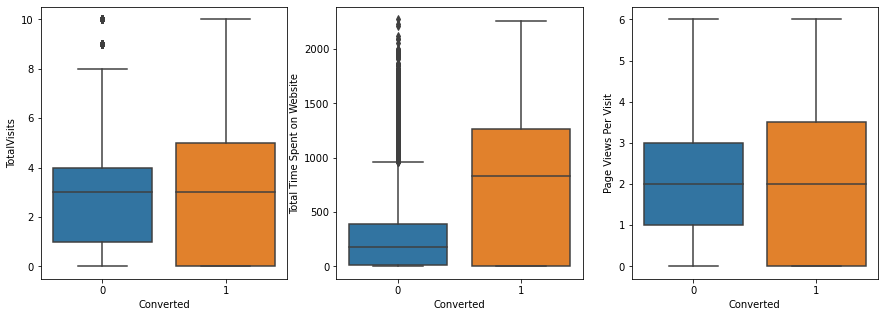

In [30]:
plt.figure(figsize=(15, 5))
for var in num_var:
    plt.subplot(1,3,num_var.index(var)+1)
    sns.boxplot(y = var , x = 'Converted', data = df_leads)
plt.show()

Observations:

•'TotalVisits' has same median values for both outputs of leads. No conclusion can be drwan from this.

•People spending more time on the website are more likely to be converted. This is also aligned with our general knowledge.

•'Page Views Per Visit' also has same median values for both outputs of leads. Hence, inconclusive.

#### Visualising Categorical Variables

In [31]:
cat_var = list(df_leads.columns[df_leads.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [32]:
# Functions to plot countplots for categorical variables with target variable

# For single plot
def plot_cat_var(var):
    plt.figure(figsize=(20, 7))
    sns.countplot(x = var, hue = "Converted", data = df_leads)
    plt.xticks(rotation = 90)
    plt.show()

# For multiple plots    
def plot_cat_vars(lst):
    l = int(len(lst)/2)
    plt.figure(figsize=(20, l*7))
    for var in lst:
        plt.subplot(l,2,lst.index(var)+1)
        sns.countplot(x = var, hue = "Converted", data = df_leads)
        plt.xticks(rotation = 90)
    plt.show()

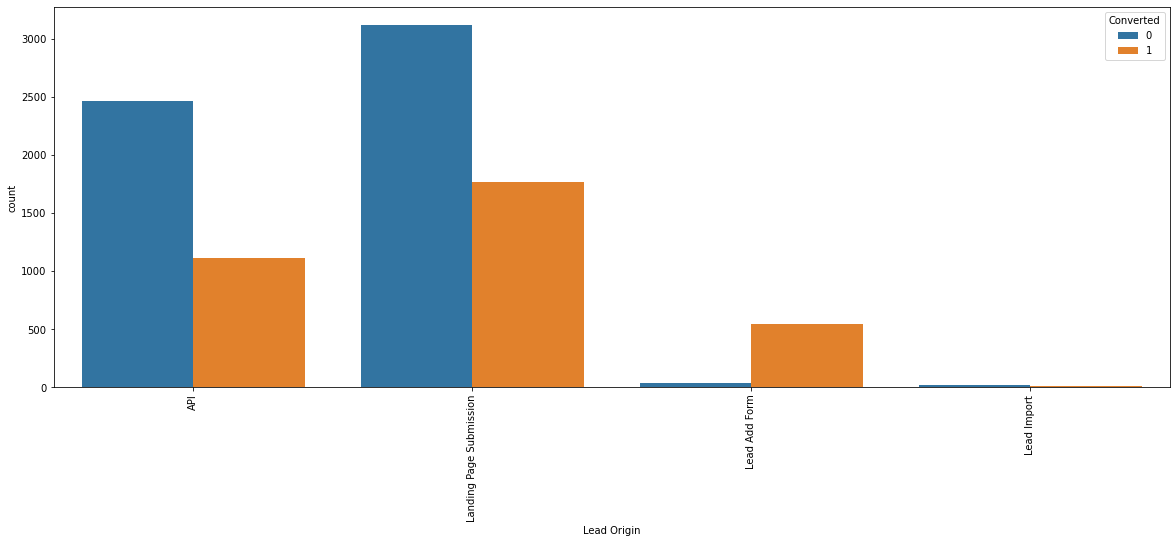

In [33]:
plot_cat_var(cat_var[0])

Observations for Lead Origin :
'API' and 'Landing Page Submission' generate the most leads but have less conversion rates of around 30%. Whereas, 'Lead Add Form' generates less leads but conversion rate is great. We should try to increase conversion rate for 'API' and 'Landing Page Submission', and increase leads generation using 'Lead Add Form'. 'Lead Import' does not seem very significant.

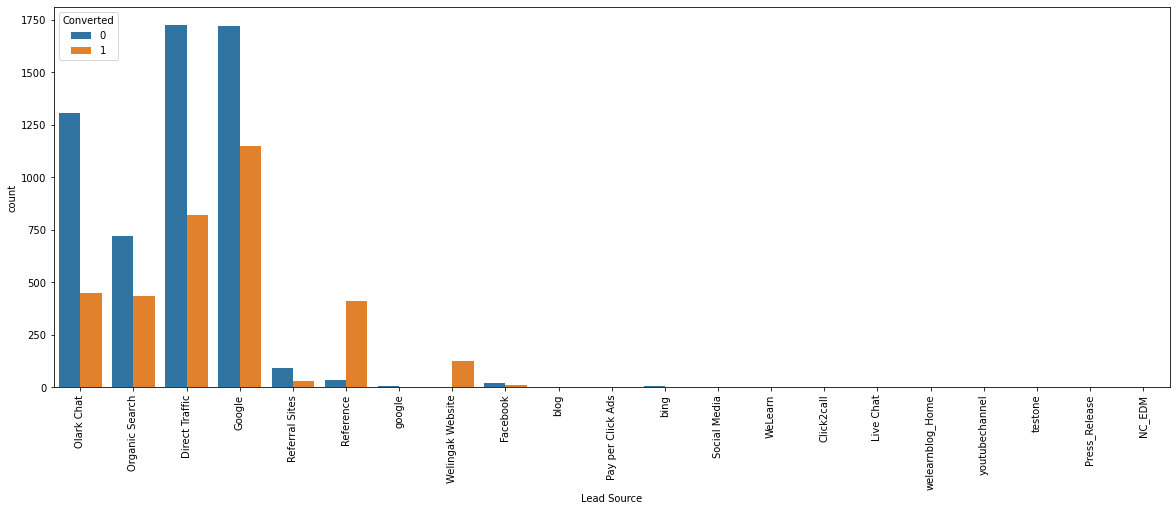

In [34]:
plot_cat_var(cat_var[1])

In [35]:
# To correct spelling error
df_leads['Lead Source'] = df_leads['Lead Source'].replace(['google'], 'Google')
categories = df_leads['Lead Source'].unique()
categories

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

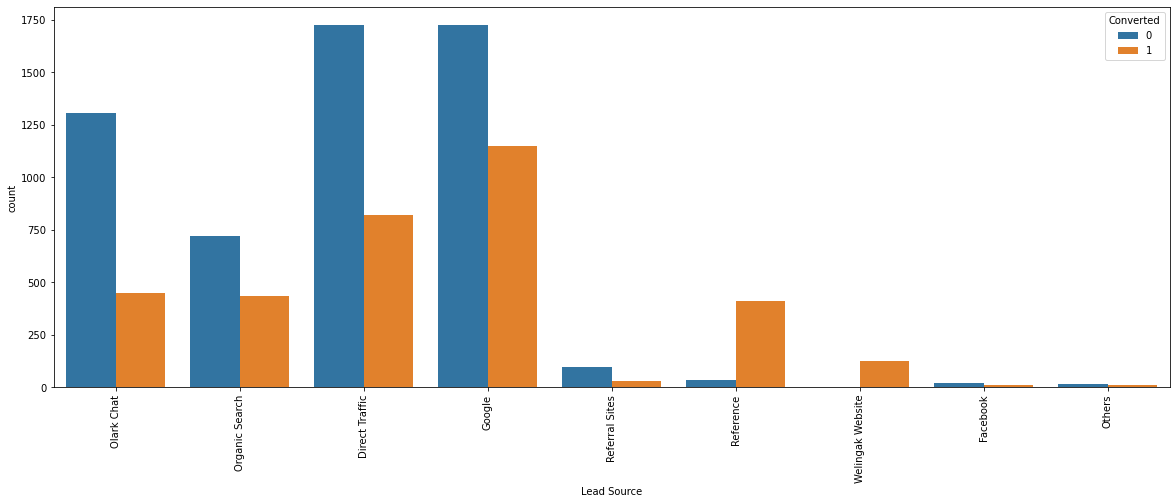

In [36]:
# To reduce categories
df_leads['Lead Source'] = df_leads['Lead Source'].replace(categories[8:], 'Others')
plot_cat_var(cat_var[1])

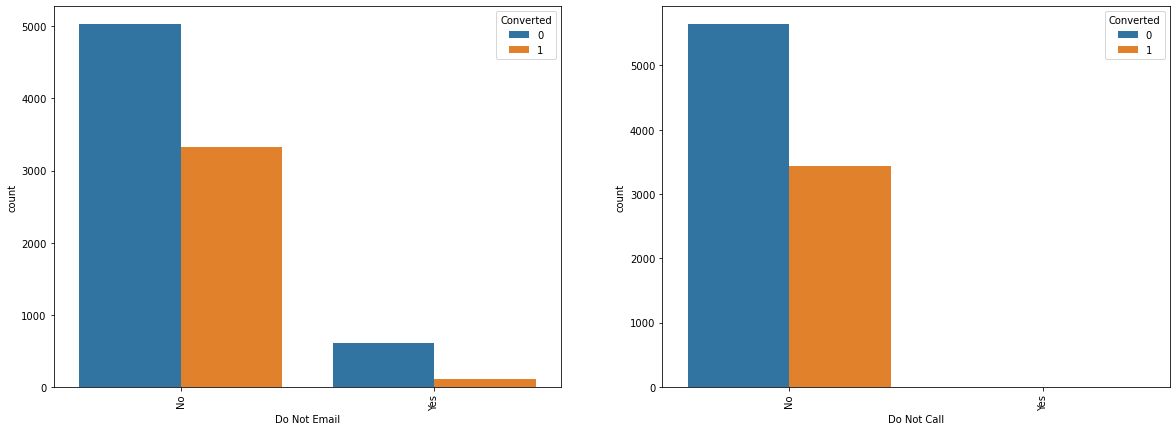

In [37]:
plot_cat_vars([cat_var[2],cat_var[3]])

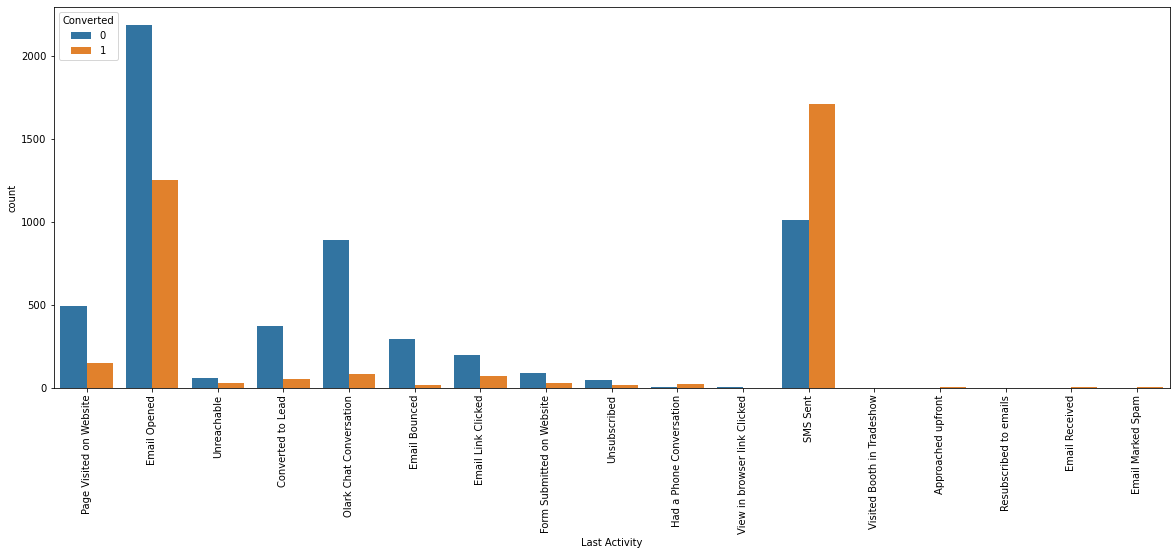

In [38]:
plot_cat_var(cat_var[4])

Observations for Last Activity :

•Highest number of lead are generated where the last activity is 'Email Opened' while maximum conversion rate is for the activity of 'SMS Sent'. Its conversion rate is significantly high.
•Categories after the 'SMS Sent' have almost negligible effect. We can aggregate them all in one single category.


In [39]:
categories = df_leads['Last Activity'].unique()
categories

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

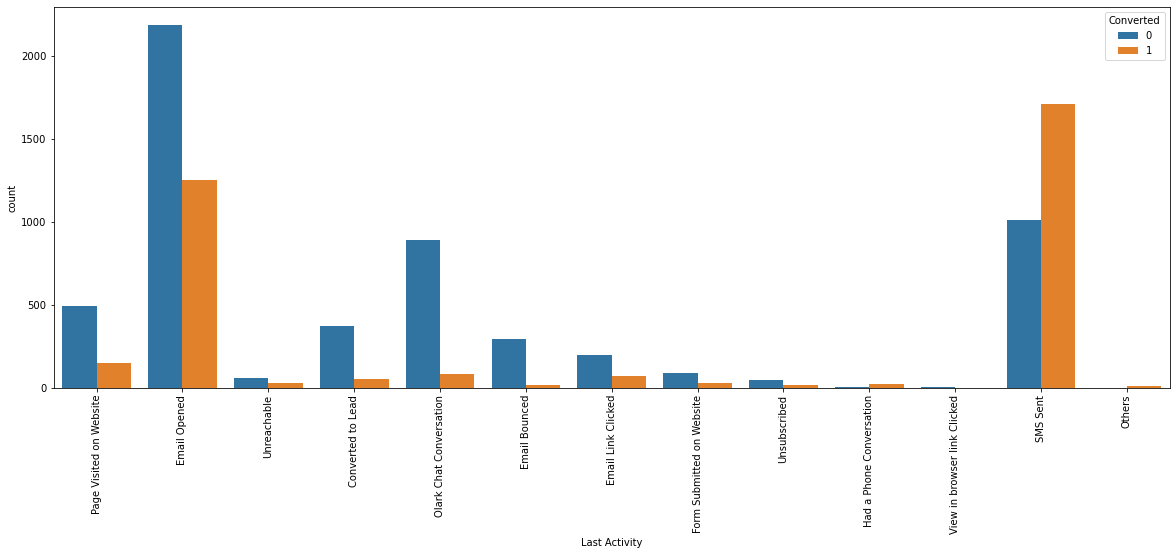

In [40]:
# To reduce categories
df_leads['Last Activity'] = df_leads['Last Activity'].replace(categories[-5:], 'Others')
plot_cat_var(cat_var[4])

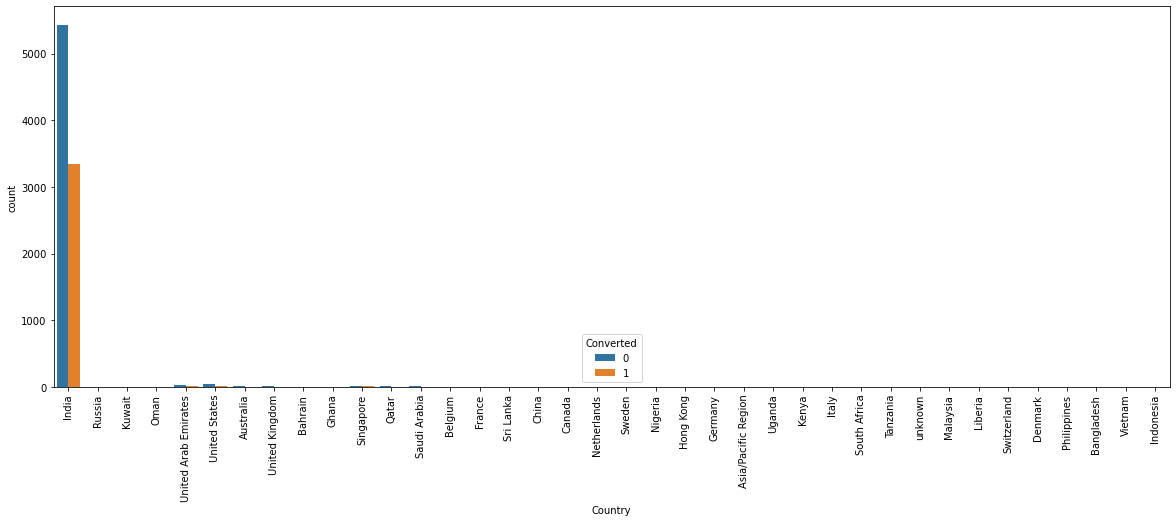

In [41]:
plot_cat_var(cat_var[5])

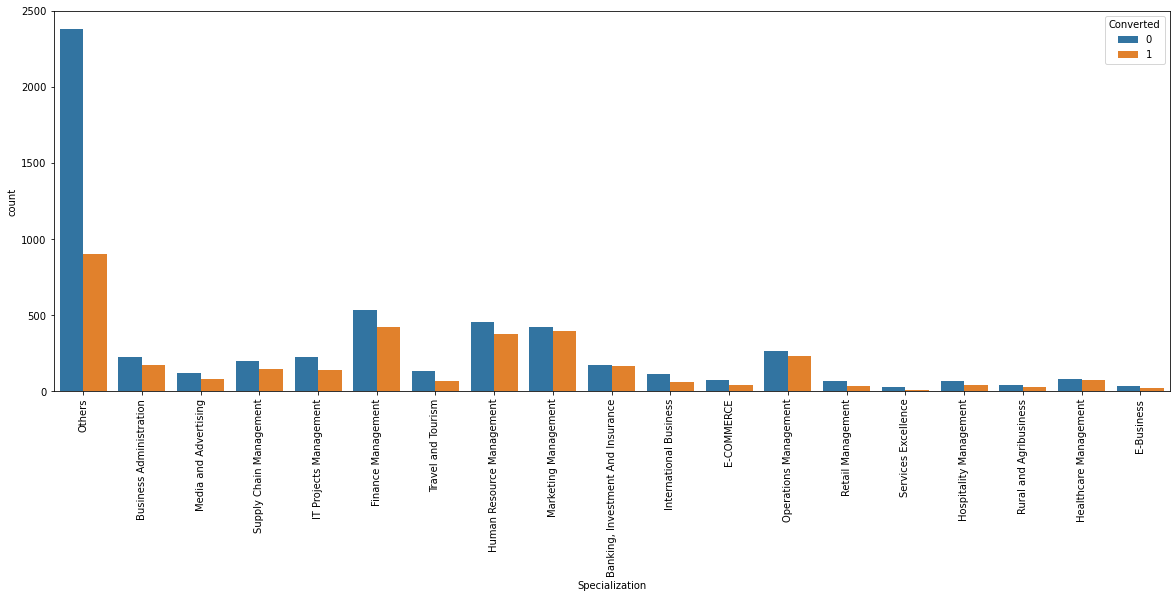

In [42]:
plot_cat_var(cat_var[6])

Observations for Specialization :
Conversion rates are mostly similar across different specializations.

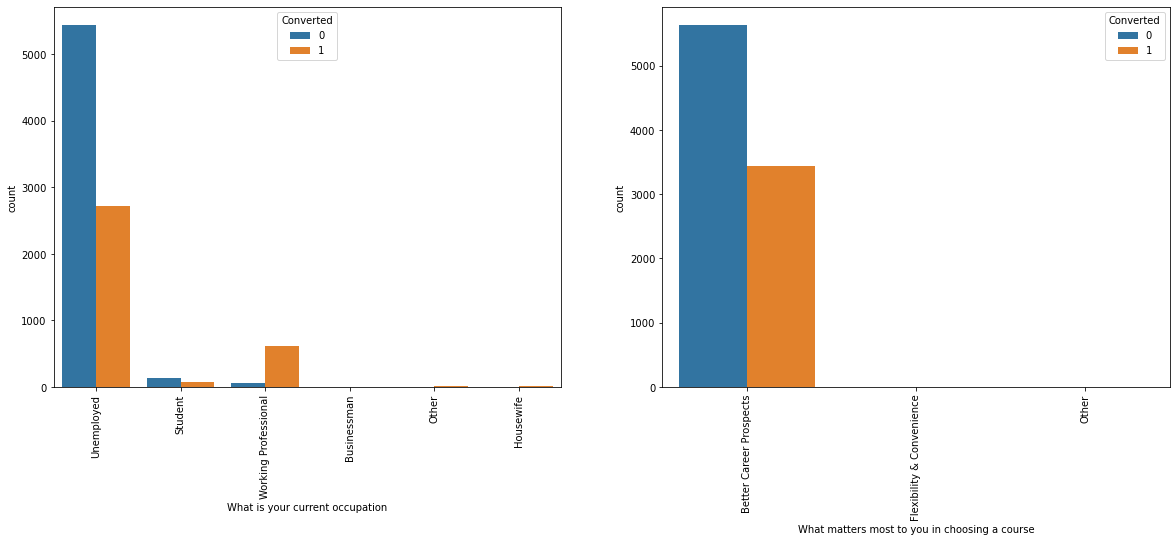

In [43]:
plot_cat_vars([cat_var[7],cat_var[8]])

Observations for What is your current occupation and What matters most to you in choosing a course :

•The highest conversion rate is for 'Working Professional'. High number of leads are generated for 'Unemployed' but conversion rate is low.
•Variable 'What matters most to you in choosing a course' has only one category with significant count.

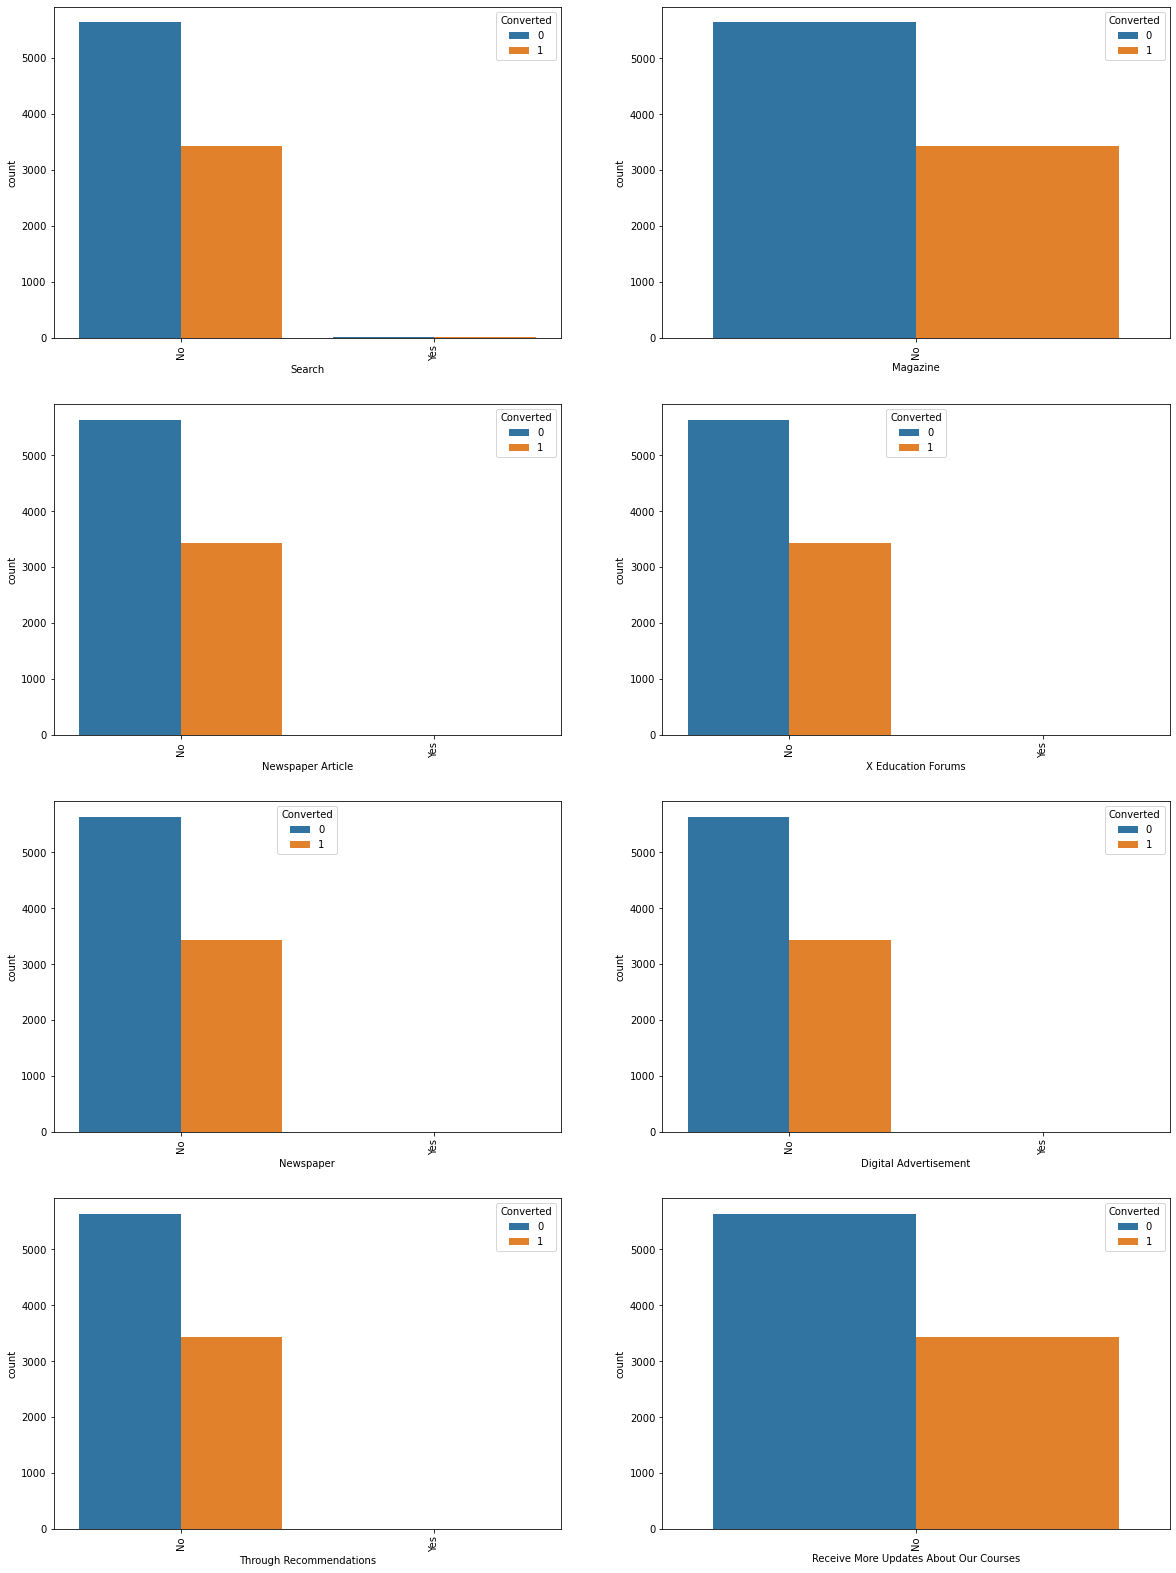

In [44]:
plot_cat_vars(cat_var[9:17])

Observations for Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, and Receive More Updates About Our Courses:
As all the above variables have most of the values as no, nothing significant can be inferred from these plots.

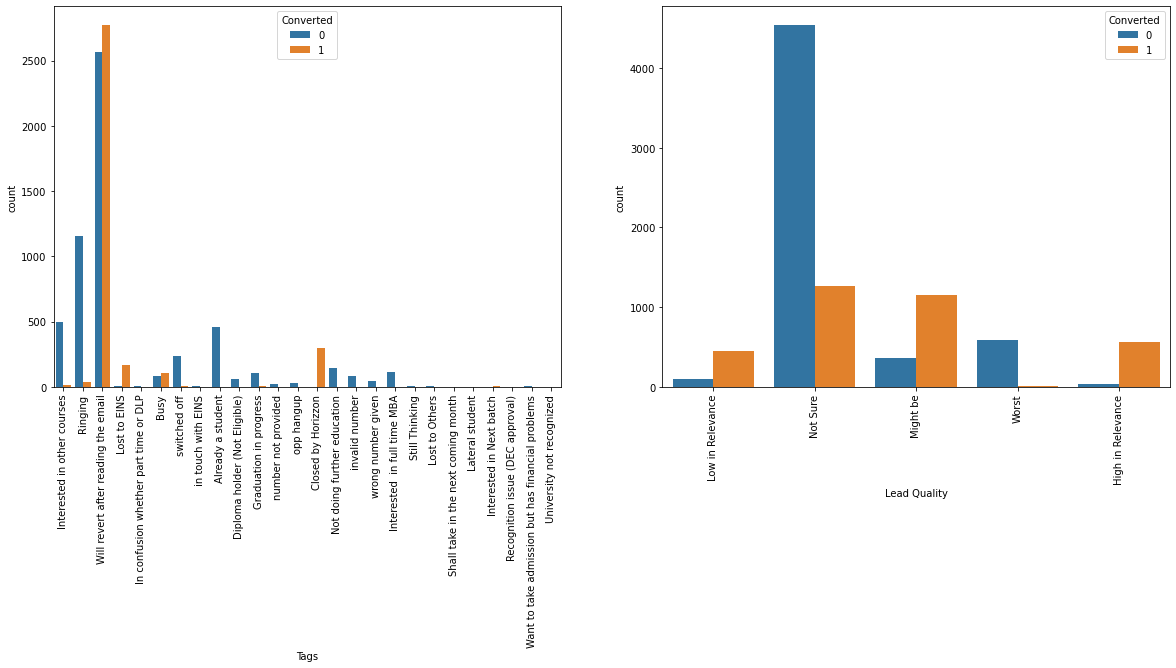

In [45]:
plot_cat_vars([cat_var[17],cat_var[18]])

Observations for Tags and Lead Quality:

•	In Tags, categories after 'Interested in full time MBA' have very few leads generated, so we can combine them into one single category.
•	Most leads generated and the highest conversion rate are both attributed to the tag 'Will revert after reading the email'.
•	In Lead quality, as expected, 'Might be' as the highest conversion rate while 'Worst' has the lowest.

In [46]:
categories = df_leads['Tags'].unique()
categories

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'number not provided', 'opp hangup', 'Closed by Horizzon',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

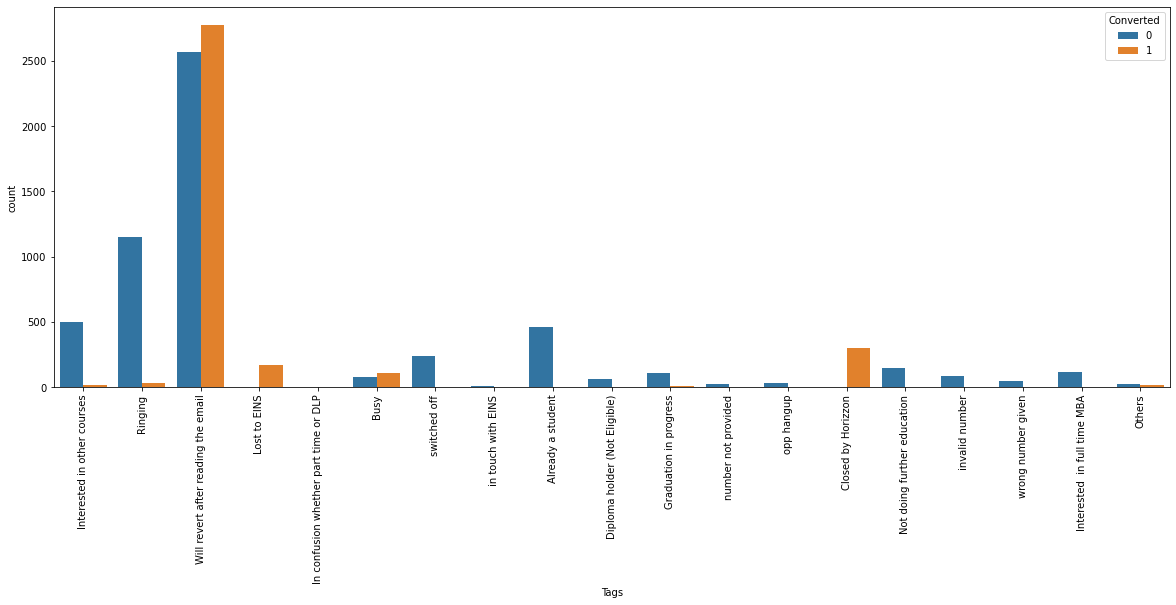

In [47]:
# To reduce categories
df_leads['Tags'] = df_leads['Tags'].replace(categories[-8:], 'Others')
plot_cat_var(cat_var[17])

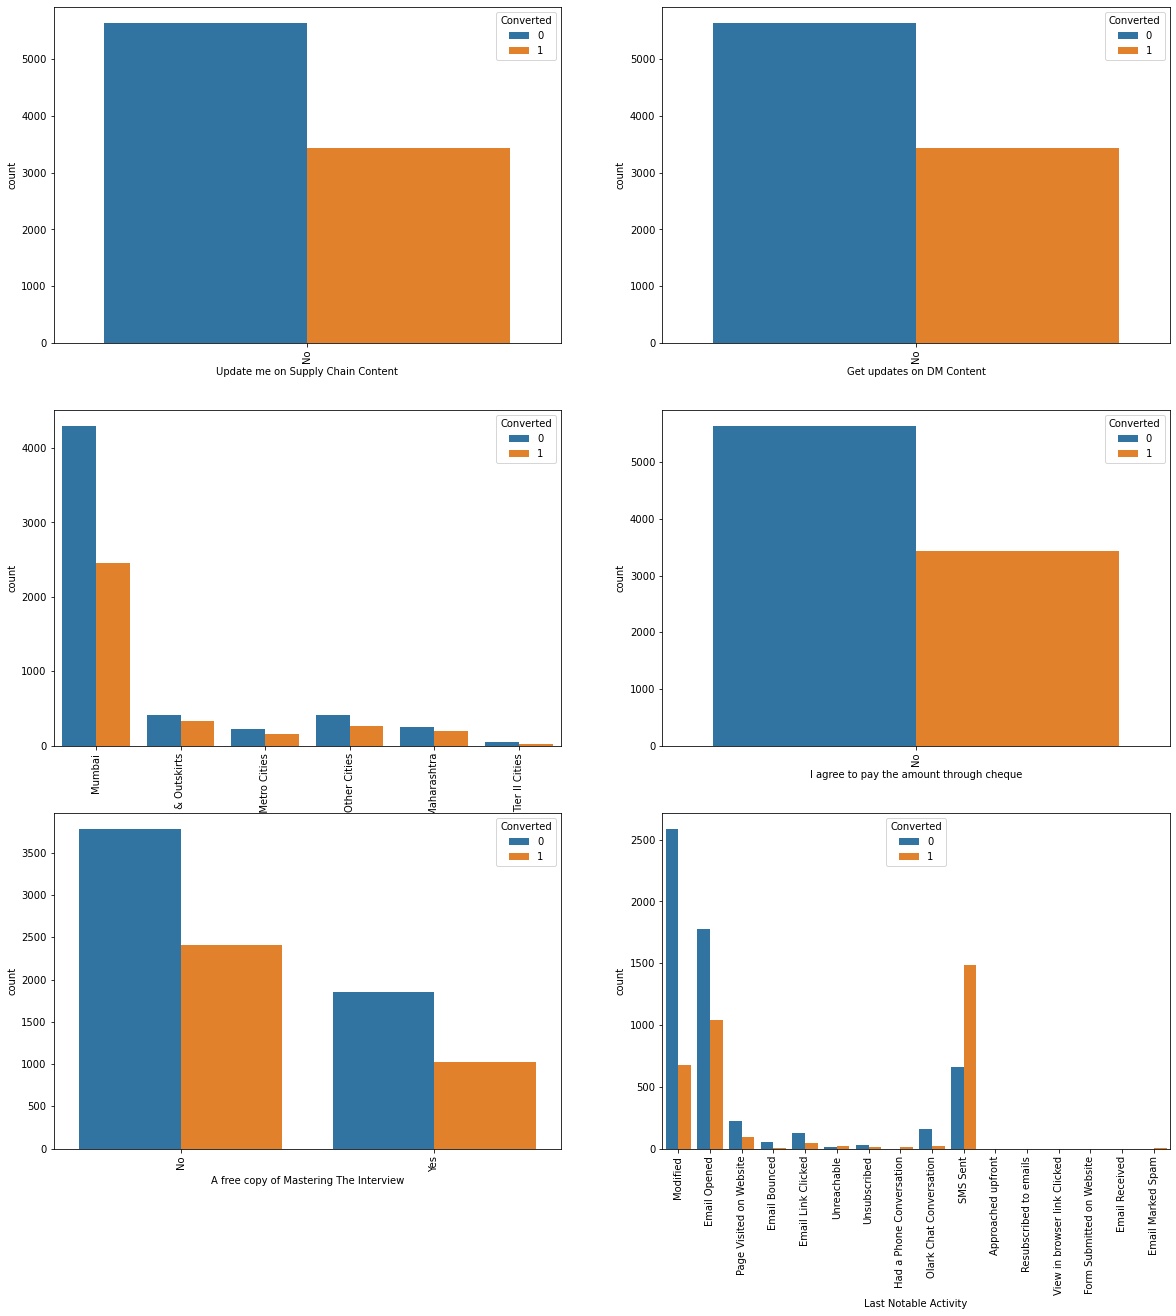

In [48]:
plot_cat_vars(cat_var[19:25])

Observations for Update me on Supply Chain Content, Get updates on DM Content, City, I agree to pay the amount through cheque, A free copy of Mastering The Interview, and Last Notable Activity :

•	Most of these variables are insignificant in analysis as many of them only have one significant category 'NO'.
•	In City, most of the leads are generated for 'Mumbai'.
•	In 'A free copy of Mastering The Interview', both categories have similar conversion rates.
•	In 'Last Notable Activity', we can combine categories after 'SMS Sent' similar to the variable 'Last Activity'. It has most generated leads for the category 'Modified' while most conversion rate for 'SMS Sent' activity.

In [49]:
categories = df_leads['Last Notable Activity'].unique()
categories

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

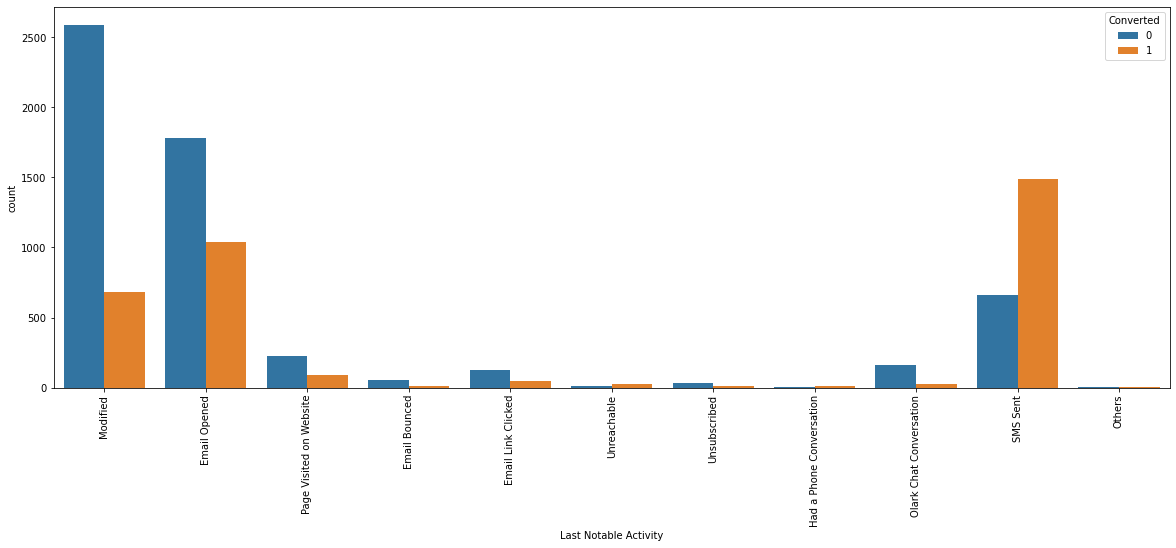

In [50]:
df_leads['Last Notable Activity'] = df_leads['Last Notable Activity'].replace(categories[-6:], 'Others')
plot_cat_var(cat_var[24])

Based on the data visualization, we can drop the variables which are not significant for analysis and will not any information to the model.

In [51]:
df_leads = df_leads.drop(['Do Not Call','Country','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                          'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                          'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                          'Get updates on DM Content','I agree to pay the amount through cheque',
                          'A free copy of Mastering The Interview'],1)
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [52]:
df_leads.shape

(9074, 14)

In [53]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Last Activity                    9074 non-null   object 
 8   Specialization                   9074 non-null   object 
 9   What is your current occupation  9074 non-null   object 
 10  Tags                             9074 non-null   object 
 11  Lead Quality                     9074 non-null   object 
 12  City                

In [54]:
df_leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.191867,482.887481,2.265943
std,0.485053,2.780618,545.256560,1.790991
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,10.000000,2272.000000,6.000000


### Data Preparation

In [55]:
df_leads['Do Not Email'] = df_leads['Do Not Email'].map({'Yes': 1, 'No': 0})

#### Dummy Variable creation

For categorical variables with multiple levels, we create dummy features (one-hot encoded).

In [56]:
cat_var = list(df_leads.columns[df_leads.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

In [57]:
dummy = pd.get_dummies(df_leads[cat_var], drop_first=True)

# To add result to the original dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

# To drop the original variables
df_leads = df_leads.drop(cat_var,1)

In [58]:
df_leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


Train-Test Split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X = df_leads.drop(['Converted'],axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [61]:
y = df_leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_var
X_train[num_var] = scaler.fit_transform(X_train[num_var])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7987,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [64]:
conversion = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
conversion

37.85541106458012

### Building the Model

After the creation of dummy variables, we have a large number of features. It is better to use RFE first for feature elimination.

#### Feature Selection using RFE

In [65]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [66]:
# Import RFE
from sklearn.feature_selection import RFE

In [67]:
# Running RFE with 15 variables as output
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)

In [68]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 21),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Others', False, 20),
 ('Lead Source_Reference', False, 44),
 ('Lead Source_Referral Sites', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 23),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', False, 43),
 ('Last Activity_Form Submitted on Website', False, 45),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 6),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_

In [69]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [70]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [71]:
# Importing statsmodels
import statsmodels.api as sm

In [72]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1264.9
Date:                Sun, 25 Dec 2022   Deviance:                       2529.8
Time:                        15:32:30   Pearson chi2:                 3.11e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6073
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.3965      0.564      2.478      0.013       0.292       2.501
Do Not Email                                     -1.2622      0.271     -4.665      0.000      -1.792      -0.732
Total Time Spent on Website                       1.1402      0.063     18.144      0.000       1.017       1.263
Lead Origin_Landing Page Submission              -1.1585      0.208     -5.565      0.000      -1.567      -0.750
Lead Origin_Lead Add Form                         1.3559      0.404      3.356      0.001       0.564       2.148
Lead Origin_Lead Import                           1.0231      0.801      1.277      0.201      -0.547       2.593
Lead Source_Olark Chat                            0.8640      0.168      5.148      0.000       0.535       1.193
Lead Source_Welingak Website                      3.7519      0.832      4.509      0.000       2.121       5.383
Last Activity_Had a Phone Conversation            1.5492      1.308      1.184      0.236      -1.015       4.113
Last Activity_Olark Chat Conversation            -0.6383      0.271     -2.353      0.019      -1.170      -0.107
Last Activity_SMS Sent                            0.9825      0.226      4.349      0.000       0.540       1.425
Last Activity_Unreachable                         0.8782      0.468      1.878      0.060      -0.038       1.795
Last Activity_Unsubscribed                        0.8334      0.714      1.168      0.243      -0.565       2.232
Specialization_E-COMMERCE                         0.8382      0.495      1.693      0.090      -0.132       1.808
Specialization_International Business            -0.5940      0.357     -1.665      0.096      -1.293       0.105
Specialization_Others                            -0.5683      0.201     -2.828      0.005      -0.962      -0.174
Specialization_Travel and Tourism                -0.5070      0.417     -1.215      0.224      -1.325       0.311
What is your current occupation_Student          -0.8877      0.584     -1.520      0.129      -2.033       0.257
What is your current occupation_Unemployed       -1.3614      0.320     -4.254      0.000      -1.989      -0.734
Tags_Busy                                         2.9714      0.506      5.871      0.000       1.979       3.963
Tags_Closed by Horizzon                           7.9290      0.894      8.864      0.000       6.176       9.682
Tags_Diploma holder (Not Eligible)               -0.8238      1.160     -0.710      0.477      -3.096       1.449
Tags_Interested  in full time MBA                -0.7015      1.024     -0.685      0.493      -2.708       1.305
Tags_Interested in other courses                 -0.7517      0.569     -1.321      0.187      -1.867       0.364
Tags_

### Assessing the Model with StatsModels

In [73]:
import statsmodels.api as sm

# Function for building the model
def build_model(X,y):
    X_sm = sm.add_constant(X)    # To add a constant
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()    # To fit the model
    print(logm.summary())    # Summary of the model  
    return X_sm, logm

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate Variance Inflation Factor (VIF)
def check_VIF(X_in):
    X = X_in.drop('const',1)    # As we don't need constant
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

In [75]:
# Function to get predicted values on train set

def get_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

In [76]:
from sklearn import metrics

# Function to get confusion matrix and accuracy
def conf_mat(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

In [77]:
# Function for calculating metric beyond accuracy
def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate - predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

Model 1
Running the first model by using the features selected by RFE

In [78]:
X1, logm1 = build_model(X_train[col],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1264.9
Date:                Sun, 25 Dec 2022   Deviance:                       2529.8
Time:                        15:32:31   Pearson chi2:                 3.11e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6073
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Model 2

In [79]:
col1 = col.drop('Tags_invalid number',1)

# To rebuild the model
X2, logm2 = build_model(X_train[col1],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6308
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1269.0
Date:                Sun, 25 Dec 2022   Deviance:                       2538.0
Time:                        15:32:31   Pearson chi2:                 3.07e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6068
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Model 3

In [80]:
col2 = col1.drop('Tags_number not provided',1)

# To rebuild the model
X3, logm3 = build_model(X_train[col2],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1270.4
Date:                Sun, 25 Dec 2022   Deviance:                       2540.8
Time:                        15:32:31   Pearson chi2:                 3.09e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6066
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Model 4

In [81]:
col3 = col2.drop('Tags_wrong number given',1)

# To rebuild the model
X4, logm4 = build_model(X_train[col3],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1273.0
Date:                Sun, 25 Dec 2022   Deviance:                       2546.0
Time:                        15:32:31   Pearson chi2:                 3.07e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6063
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

All of the features have p-value close to zero i.e. they all seem significant.

We also have to check VIFs (Variance Inflation Factors) of features to see if there's any multicollinearity present.

In [82]:
check_VIF(X4)

,Features,VIF
17,What is your current occupation_Unemployed,12.20
32,Lead Quality_Not Sure,7.87
27,Tags_Will revert after reading the email,7.53
39,Last Notable Activity_SMS Sent,6.89
2,Lead Origin_Landing Page Submission,6.71
9,Last Activity_SMS Sent,6.56
14,Specialization_Others,4.86
36,Last Notable Activity_Modified,3.15
26,Tags_Ringing,2.68
31,Lead Quality_Might be,2.51


<AxesSubplot:>

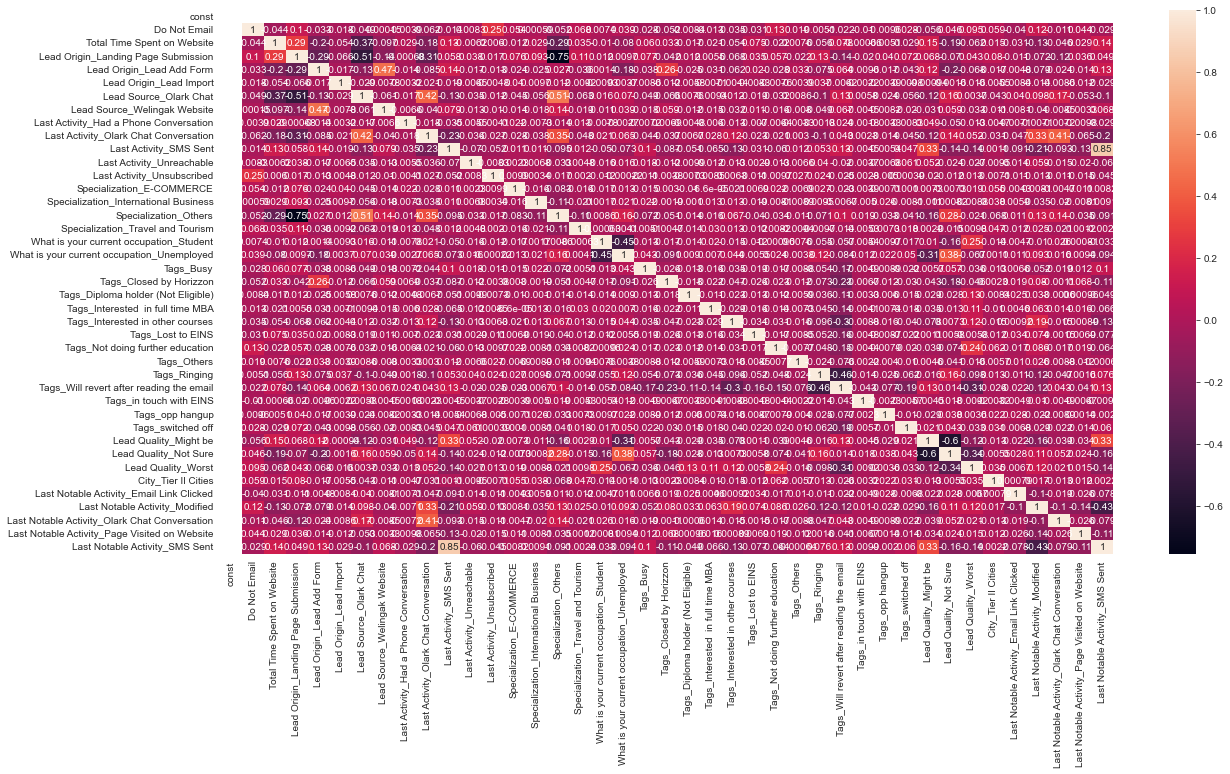

In [126]:
# To plot correlations
plt.figure(figsize = (20,10))  
sns.heatmap(X4.corr(),annot = True)

From VIF values and heat maps, we can see that there is not much multicollinearity present. All variables have a good value of VIF. These features seem important from the business aspect as well. So we need not drop any more variables and we can proceed with making predictions using this model only.

In [84]:
# To get predicted values on train set
y_train_pred_final = get_pred(X4,logm4)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,0,0.147648,3009,0
1,0,0.067212,1012,0
2,0,0.001493,9226,0
3,1,0.930066,4750,1
4,1,0.997553,7987,1


In [85]:
# Confusion Matrix and accuracy
confusion = conf_mat(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[3720  185]
 [ 282 2164]]
Training Accuracy:  0.9264682727129586


This is our final model:

All p-values are very close to zero.
VIFs for all features are very low. There is hardly any multicollinearity present.
Training accuracy of 91.95% at a probability threshold of 0.05 is also very good.

#### Metrics beyond simply Accuracy

In [86]:
other_metrics(confusion)

Sensitivity:  0.884709730171709
Specificity:  0.9526248399487837
False postive rate - predicting the lead conversion when the lead does not convert:  0.04737516005121639
Positive predictive value:  0.9212430821626224
Negative predictive value:  0.9295352323838081


### Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [87]:
# Function to plot ROC
def plot_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [88]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

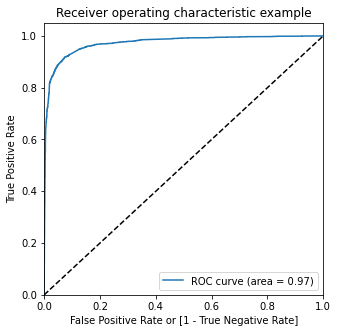

In [89]:
# To plot ROC
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [90]:
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

Area under curve:  0.9728429074409288


#### Finding Optimal Cutoff Point

Optimal cutoff probability is the prob where we get balanced sensitivity and specificity.

In [91]:
# To create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.147648,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.067212,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.001493,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.930066,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.997553,7987,1,1,1,1,1,1,1,1,1,1,1


In [92]:
# To calculate accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1]    # True positive 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.839080  0.971382  0.756210
0.2   0.2  0.891828  0.957890  0.850448
0.3   0.3  0.920013  0.921096  0.919334
0.4   0.4  0.923792  0.904334  0.935980
0.5   0.5  0.926468  0.884710  0.952625
0.6   0.6  0.923792  0.857727  0.965173
0.7   0.7  0.920328  0.829109  0.977465
0.8   0.8  0.899858  0.765331  0.984123
0.9   0.9  0.875295  0.691333  0.990525


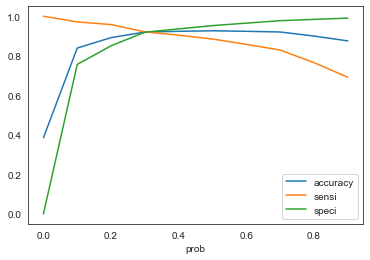

In [93]:
# To plot accuracy, sensitivity and specificity for various probabilities
sns.set_style('white')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [94]:
# Using 0.2 threshold for predictions
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.147648,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.067212,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.001493,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.930066,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.997553,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [95]:
# Confusion matrix and Overall Accuracy
confusion2 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

Confusion Matrix:
[[3655  250]
 [ 234 2212]]
Training Accuracy:  0.9237915288930877


In [96]:
other_metrics(confusion2)

Sensitivity:  0.9043336058871627
Specificity:  0.9359795134443022
False postive rate - predicting the lead conversion when the lead does not convert:  0.06402048655569782
Positive predictive value:  0.8984565393988627
Negative predictive value:  0.9398302905631267


##### Classification Report

In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3905
           1       0.90      0.90      0.90      2446

    accuracy                           0.92      6351
   macro avg       0.92      0.92      0.92      6351
weighted avg       0.92      0.92      0.92      6351



### Precision-Recall

Precision = TP / TP + FP

In [98]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9212430821626224

Recall = TP / TP + FN

In [99]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.884709730171709

In [100]:
from sklearn.metrics import precision_score, recall_score

In [101]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9212430821626224

In [102]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.884709730171709

#### Precision and recall tradeoff

In [103]:
from sklearn.metrics import precision_recall_curve

In [104]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [105]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

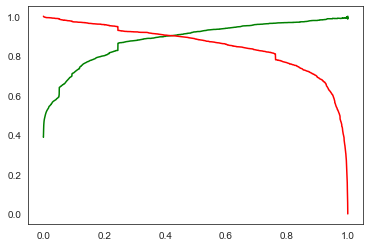

In [106]:
# To plot precision vs recall for different thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [107]:
# Using 0.25 threshold for predictions
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.147648,3009,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.067212,1012,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.001493,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.930066,4750,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.997553,7987,1,1,1,1,1,1,1,1,1,1,1,1,1


In [108]:
# Confusion matrix and overall accuracy
confusion3 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted_pr)

Confusion Matrix:
[[3554  351]
 [ 177 2269]]
Training Accuracy:  0.9168634860651866


In [109]:
# Other metrics
other_metrics(confusion3)

Sensitivity:  0.9276369582992641
Specificity:  0.9101152368758002
False postive rate - predicting the lead conversion when the lead does not convert:  0.08988476312419974
Positive predictive value:  0.8660305343511451
Negative predictive value:  0.9525596354864647


### Making Predictions on the Test Set

In [110]:
# Feature transform on Test set
X_test[num_var] = scaler.fit_transform(X_test[num_var])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,0,0.304501,-0.591008,0.998931,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1490,0,0.666261,1.894051,1.564920,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7936,0,-0.419021,-0.743117,-0.133048,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4216,0,-1.142542,-0.878732,-1.265027,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3830,0,1.751544,-0.578179,2.130909,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [111]:
# To get final features
X_test_sm = X_test[col3]
X_test_sm = sm.add_constant(X_test_sm)

In [112]:
y_test_pred = logm4.predict(X_test_sm)

y_test_pred[:10]

3271    0.160791
1490    0.996581
7936    0.138814
4216    0.999799
3830    0.097264
1800    0.936009
6507    0.005337
4821    0.000867
4223    0.995361
4714    0.218257
dtype: float64

In [113]:
# To convert y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
3271,0.160791
1490,0.996581
7936,0.138814
4216,0.999799
3830,0.097264


In [114]:
# To convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [115]:
# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [116]:
# To remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [117]:
# To append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Lead ID,0
0,0,3271,0.160791
1,1,1490,0.996581
2,0,7936,0.138814
3,1,4216,0.999799
4,0,3830,0.097264


In [118]:
# To Rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,0,3271,0.160791
1,1,1490,0.996581
2,0,7936,0.138814
3,1,4216,0.999799
4,0,3830,0.097264


In [119]:
# To put the threshold of 0.2 as derived
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.160791,0
1,1,1490,0.996581,1
2,0,7936,0.138814,0
3,1,4216,0.999799,1
4,0,3830,0.097264,0


In [120]:
print("Area under curve: ", metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_prob))

Area under curve:  0.9650705044999026


In [121]:
# Confusion matrix and overall accuracy
confusion_test = conf_mat(y_pred_final.Converted,y_pred_final.final_predicted)

Confusion Matrix:
[[1466  268]
 [  48  941]]
Training Accuracy:  0.8839515240543518


In [122]:
other_metrics(confusion_test)

Sensitivity:  0.9514661274014156
Specificity:  0.845444059976932
False postive rate - predicting the lead conversion when the lead does not convert:  0.15455594002306805
Positive predictive value:  0.7783291976840364
Negative predictive value:  0.9682959048877147


In [123]:
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1734
           1       0.78      0.95      0.86       989

    accuracy                           0.88      2723
   macro avg       0.87      0.90      0.88      2723
weighted avg       0.90      0.88      0.89      2723



### Conclusion

It was found that the variables that mattered the most in the potential buyers are (In descending order) :

The total time spend on the Website.

Total number of visits.

When the lead source was:

a. Google

b. Direct traffic

c. Organic search

d. Welingak website

4. When the last activity was:

a. SMS

b. Olark chat conversation

5. When the lead origin is Lead add format. 6. When their current occupation is as a working professional.

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.